## Dragon Real Estate- Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,1.CRIM,2. ZN,3. INDUS,4. CHAS,5. NOX,6. RM,7. AGE,8. DIS,9. RAD,10. TAX,11. PTRATIO,12. B,13. LSTAT,14. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1.CRIM       506 non-null    float64
 1   2. ZN        506 non-null    float64
 2   3. INDUS     506 non-null    float64
 3   4. CHAS      506 non-null    int64  
 4   5. NOX       506 non-null    float64
 5   6. RM        506 non-null    float64
 6   7. AGE       506 non-null    float64
 7   8. DIS       505 non-null    float64
 8   9. RAD       506 non-null    int64  
 9   10. TAX      506 non-null    int64  
 10  11. PTRATIO  506 non-null    float64
 11  12. B        506 non-null    float64
 12  13. LSTAT    506 non-null    float64
 13  14. MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['4. CHAS'].value_counts()

4. CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,1.CRIM,2. ZN,3. INDUS,4. CHAS,5. NOX,6. RM,7. AGE,8. DIS,9. RAD,10. TAX,11. PTRATIO,12. B,13. LSTAT,14. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,505.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.791764,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.106505,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100000,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.199200,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.118000,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))

## TRAIN-TEST SPLITTING

In [9]:
# import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(50)
#     shuffled=np.random.permutation(len(data))
#     print shuff
#     test_set_size=int(len(data)*test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['4. CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set['4. CHAS'].value_counts()

4. CHAS
0    95
1     7
Name: count, dtype: int64

In [15]:
strat_train_set['4. CHAS'].value_counts()

4. CHAS
0    376
1     28
Name: count, dtype: int64

In [16]:
# 95/7

In [17]:
# 376/28

In [18]:
housing = strat_train_set.copy()

## Looking for Correlations

In [19]:
corr_matrix = housing.corr()
corr_matrix['14. MEDV'].sort_values(ascending=False)


14. MEDV       1.000000
6. RM          0.679894
12. B          0.361761
2. ZN          0.339741
8. DIS         0.240825
4. CHAS        0.205066
7. AGE        -0.364596
9. RAD        -0.374693
1.CRIM        -0.393715
5. NOX        -0.422873
10. TAX       -0.456657
3. INDUS      -0.473516
11. PTRATIO   -0.493534
13. LSTAT     -0.740494
Name: 14. MEDV, dtype: float64

In [20]:
 #from pandas.plotting import scatter_matrix
 #attributes = ["14. MEDV", "6. RM", "2. ZN", "13. LSTAT"]
 #scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='6. RM', ylabel='14. MEDV'>

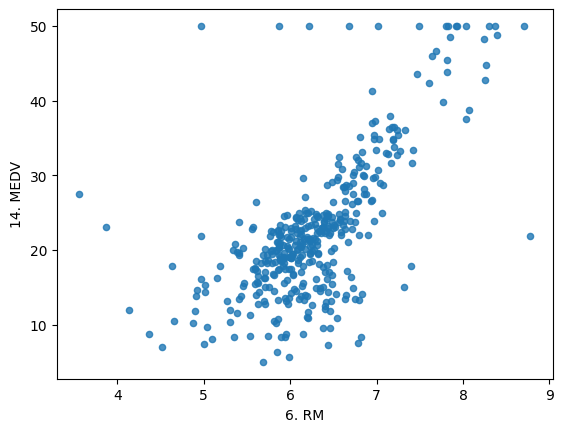

In [21]:
housing.plot(kind="scatter", x="6. RM", y="14. MEDV", alpha=0.8)

## Trying out Attribute combinations

In [22]:
housing["TAXRM"] = housing['10. TAX']/housing['6. RM']

In [23]:
housing.head()

,1.CRIM,2. ZN,3. INDUS,4. CHAS,5. NOX,6. RM,7. AGE,8. DIS,9. RAD,10. TAX,11. PTRATIO,12. B,13. LSTAT,14. MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [24]:
corr_matrix = housing.corr()
corr_matrix['14. MEDV'].sort_values(ascending=False)

14. MEDV       1.000000
6. RM          0.679894
12. B          0.361761
2. ZN          0.339741
8. DIS         0.240825
4. CHAS        0.205066
7. AGE        -0.364596
9. RAD        -0.374693
1.CRIM        -0.393715
5. NOX        -0.422873
10. TAX       -0.456657
3. INDUS      -0.473516
11. PTRATIO   -0.493534
TAXRM         -0.525160
13. LSTAT     -0.740494
Name: 14. MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='14. MEDV'>

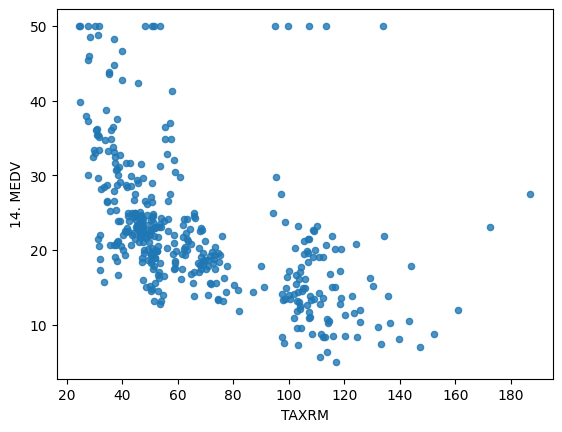

In [25]:
housing.plot(kind="scatter", x="TAXRM", y="14. MEDV", alpha=0.8)

In [26]:
housing = strat_train_set.drop("14. MEDV", axis=1)
housing_labels = strat_train_set["14. MEDV"].copy()

## Missing Attributes##

In [27]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [28]:
a = housing.dropna(subset=["6. RM"]) #Option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(404, 13)

In [29]:
housing.drop("6. RM", axis=1).shape # Option 2
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

(404, 12)

In [30]:
median = housing["6. RM"].median() # Compute median for Option 3
median

6.21

In [31]:
housing["6. RM"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: 6. RM, Length: 404, dtype: float64

In [32]:
housing.shape

(404, 13)

In [33]:
housing.describe() # before we started filling missing attributes

,1.CRIM,2. ZN,3. INDUS,4. CHAS,5. NOX,6. RM,7. AGE,8. DIS,9. RAD,10. TAX,11. PTRATIO,12. B,13. LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,403.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.741980,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099942,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.031250,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.112100,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.057250,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [35]:
#SimpleImputer(add_indicator=False, copy=True, fill_value=None,missing_values=nan, strategy='median', verbose=0)


In [36]:
imputer.statistics_.shape

(13,)

In [37]:
X = imputer.transform(housing)

In [38]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [39]:
housing_tr.describe()

,1.CRIM,2. ZN,3. INDUS,4. CHAS,5. NOX,6. RM,7. AGE,8. DIS,9. RAD,10. TAX,11. PTRATIO,12. B,13. LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.740421,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.097569,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.112100,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.035675,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

## Feature Scaling

## Creating a Pipeline

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [41]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [42]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting a desired model for Dragon Real Estates

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [44]:
#RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
 #                     max_features='auto', max_leaf_nodes=None,
  #                    min_impurity_decrease=0.0, min_impurity_split=None,
   #                   min_samples_leaf=1, min_samples_split=2,
    #                  min_weight_fraction_leaf=0.0, n_estimators=10,
     #                 n_jobs=None, oob_score=False, random_state=None,
      #                verbose=0, warm_start=False)

In [45]:
some_data = housing.iloc[:5]

In [46]:
some_labels = housing_labels.iloc[:5]

In [47]:
prepared_data = my_pipeline.transform(some_data)

In [48]:
model.predict(prepared_data)

array([22.219, 25.326, 16.315, 23.334, 23.431])

In [49]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

##Evaluating the model

In [50]:
import numpy as np

In [51]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [52]:
rmse

1.2311345337123023

##using better evaluation technique - cross validation

In [53]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [54]:
rmse_scores

array([2.91040815, 2.88940357, 4.51497096, 2.74021781, 3.45621906,
       2.53322316, 4.65512073, 3.39306309, 3.30676423, 3.3261607 ])

In [55]:
#array([3.04485171, 2.48131898, 4.63312016, 2.8778676 , 3.41281409,
 #      3.03586684, 4.85712775, 3.52571837, 2.89743852, 4.18037857])

In [56]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [57]:
print_scores(rmse_scores)

Scores: [2.91040815 2.88940357 4.51497096 2.74021781 3.45621906 2.53322316
 4.65512073 3.39306309 3.30676423 3.3261607 ]
Mean:  3.372555145184008
Standard deviation:  0.6719623112146018


Quiz: Convert this notebook into a python file and run the pipeline using Visual Studio Code


## Saving the model

In [58]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

## testing the model on test data

In [59]:
X_test = strat_test_set.drop("14. MEDV", axis=1)
Y_test = strat_test_set["14. MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions, list(Y_test))

[24.248 11.578 25.619 22.014 18.414 15.055 19.846 14.486 31.582 43.512
 19.097 12.072 23.223 28.369 19.62  10.755 31.456 14.137 23.584 18.762
 19.903 18.31  17.568 22.18  18.475 31.261 16.122 32.563  8.259 33.148
 23.741 21.381 22.615 10.773 21.301 11.414 44.123 24.506 22.859 42.607
 24.061 29.757 20.356 20.831 19.202 33.893 44.48  20.129 20.17  21.554
 21.165 14.655 20.959 14.661 24.839 33.464 43.703 28.997 19.425 20.633
 47.296  9.992 18.972 25.355 14.149 32.748 19.602 17.998 19.644 34.227
 25.348 22.749 21.513 22.527 34.182 13.031 15.696 20.287 20.822 21.252
 22.706 20.691 14.433 23.305 20.708 21.146 14.514 21.02  21.557 23.085
 18.312 26.555  7.313 26.138 18.407 29.614 19.197 31.322 14.731 26.395
 21.65  19.97 ] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [60]:
final_rmse

2.924278957549813

In [61]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61573028, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [62]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)


array([24.349])